In [1]:
# Basic Library
import numpy as np
import pandas as pd

# Libraries for Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings;
warnings.filterwarnings('ignore')

#### <i>matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)

In [2]:
df = pd.read_csv("../Data/Final_Four 2020-2021-2.csv")
df.head()

,Player,Club,Number,Position,Country,Age,Height,Games,Minutes,2FG,...,Rebounds,Assists,Steals,Turnovers,Blocks(Fv),Blocks(Ag),Fouls(Cm),Fouls(Rv),PIR,PIR(Avg)
0,Adam Hanga,FC Barcelona,8,Forward,Hungary,31,200,41,652,48/101,...,90,69,32,48,11,5,77,47,198,4.8
1,Adrien Moerman,Anadolu Efes,18,Forward,France,32,202,41,841,72/119,...,189,45,24,39,6,7,60,51,347,8.5
2,Alex Abrines,FC Barcelona,21,Forward,Spain,27,198,39,730,22/50,...,72,26,22,13,8,7,96,39,182,4.7
3,Alexander Khomenko,CSKA Moscow,4,Guard,Russia,21,192,16,100,9/17,...,4,4,0,8,0,1,24,24,15,0.9
4,Andrea Cinciarini,AX Armani Exchange Milan,20,Guard,Italy,34,193,8,19,0/0,...,2,2,0,2,0,0,5,2,-3,-0.4


In [3]:
df['Position'].value_counts()

Guard      26
Forward    24
Center     15
Name: Position, dtype: int64

In [4]:
df['Position'].value_counts().index

Index(['Guard', 'Forward', 'Center'], dtype='object')

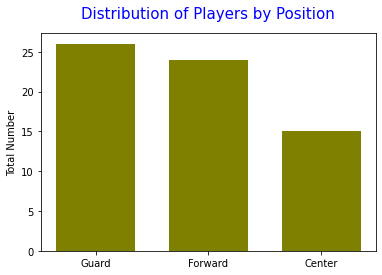

In [5]:
plt.bar(df['Position'].value_counts().index, df['Position'].value_counts(), color='olive', width=0.7)

plt.ylabel("Total Number")
plt.title('Distribution of Players by Position', color='blue', fontsize=15, pad=15);

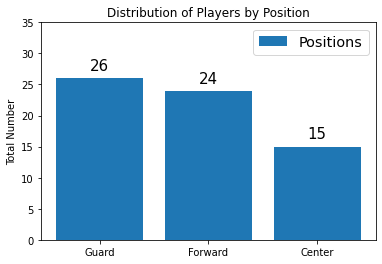

In [6]:
a = plt.bar(df['Position'].value_counts().index, df['Position'].value_counts(), label='Positions')

plt.ylabel("Total Number")
plt.title('Distribution of Players by Position')

plt.ylim(0,35)
plt.bar_label(a, padding=5, size=15)
plt.legend(fontsize='x-large');

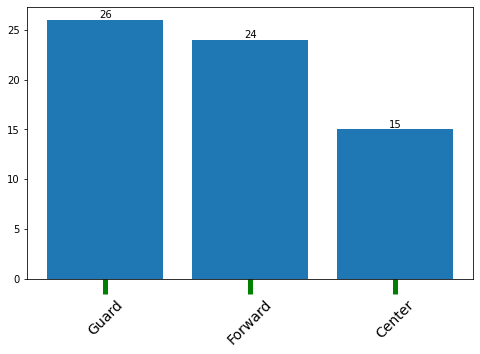

In [6]:
fig = plt.figure(figsize=(8,5))

x = df['Position'].value_counts().index
y = df['Position'].value_counts().values

plt.bar(x, y)

for i in range(len(x)):
        plt.text(x[i],y[i],str(y[i]), ha='center', va='bottom')
        
plt.tick_params(axis='x', rotation=45, size=15, labelsize=14, color='green', width=5)
plt.show()

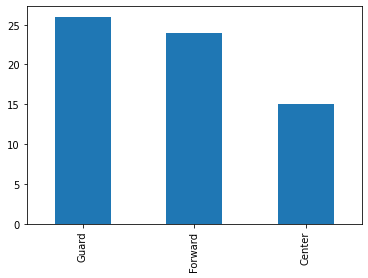

In [17]:
# WITH PANDAS
df.Position.value_counts().plot.bar();

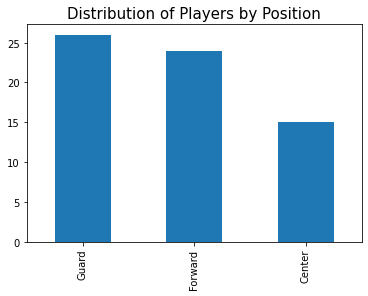

In [7]:
# WITH PANDAS

fig, ax = plt.subplots()

df.Position.value_counts().plot(kind='bar', ax=ax)

# or
# ax = kill.gender.value_counts().plot(kind='bar')

ax.set_title("Distribution of Players by Position", fontsize=15)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+20));

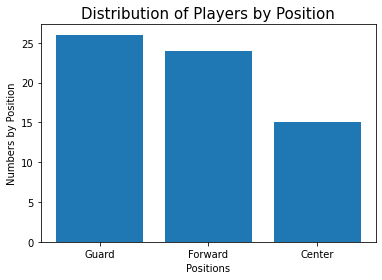

In [14]:
# WITH MATPLOTLIB

fig, ax = plt.subplots()

ax.bar(df.Position.value_counts().index, df.Position.value_counts().values)
ax.set_title("Distribution of Players by Position", fontsize=15)

ax.set_ylabel("Numbers by Position")
ax.set_xlabel("Positions")

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+20));

In [9]:
ax.patches

In [10]:
ax.patches[1]

In [11]:
ax.patches[1].get_x()

0.6

In [12]:
ax.patches[1].get_height()

24

## Multiple Bars

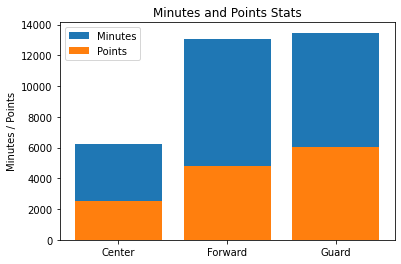

In [8]:
label = df.groupby('Position')['Points'].sum().index 

x = df.groupby('Position')['Minutes'].sum()
y = df.groupby('Position')['Points'].sum()

plt.bar(label, x, label='Minutes')
plt.bar(label, y, label='Points')

#plt.xticks(label)

plt.ylabel("Minutes / Points")
plt.title('Minutes and Points Stats')
plt.legend();

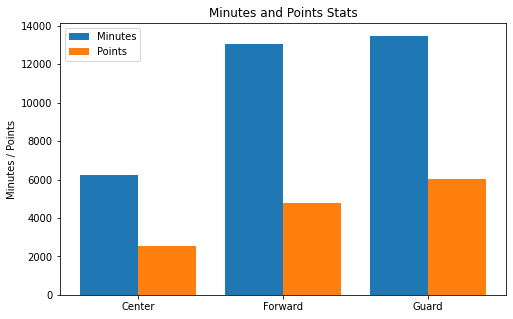

In [9]:
fig = plt.figure(figsize=(8,5))

p = np.arange(len(df.groupby('Position'))) 

x = df.groupby('Position')['Minutes'].sum()
y = df.groupby('Position')['Points'].sum()

plt.bar(p-0.2, x, width=0.4, label='Minutes')
plt.bar(p+0.2, y, width=0.4, label='Points')

plt.xticks(p, label)

plt.ylabel("Minutes / Points")
plt.title('Minutes and Points Stats')
plt.legend();

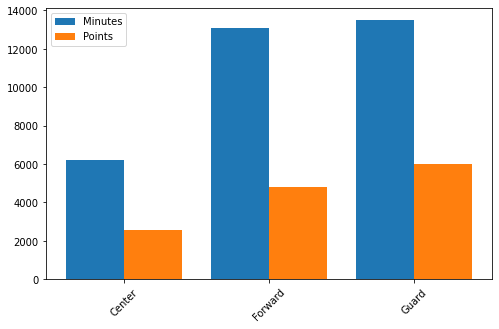

In [13]:
# OOM

label = df.groupby('Position')['Points'].sum().index 

x = df.groupby('Position')['Minutes'].sum()
y = df.groupby('Position')['Points'].sum()

fig, ax = plt.subplots(figsize=(8,5))

p = np.arange(len(df.groupby('Position')))

ax.bar(p-0.2, x, width=0.4, label='Minutes')
ax.bar(p+0.2, y, width=0.4, label='Points')

ax.set_xticks(p)
ax.set_xticklabels(label, rotation=45)

ax.legend();

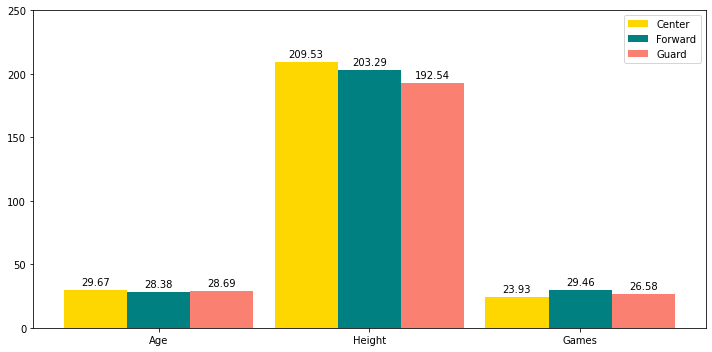

In [30]:
fig, ax = plt.subplots(figsize=(10,5))

p = np.arange(len(df.Position.unique()))

size1 = df.groupby("Position")["Age"].mean().values
size2 = df.groupby("Position")["Height"].mean().values
size3 = df.groupby("Position")["Games"].mean().values

a = ax.bar(p - 0.3, [size1[0], size2[0], size3[0]], width = 0.3, color='gold', label="Center")    
b = ax.bar(p, [size1[1], size2[1], size3[1]], width=0.3, color='teal', label="Forward")   
c = ax.bar(p + 0.3, [size1[2], size2[2], size3[2]], width=0.3, color='salmon', label="Guard")

ax.bar_label(a, padding=3, fmt='%.2f')
ax.bar_label(b, padding=3, fmt='%.2f')
ax.bar_label(c, padding=3, fmt='%.2f')
   
ax.set_xticks(p)
ax.set_xticklabels(["Age", "Height", "Games"])

ax.set_ylim(0, 250)
ax.legend()
fig.tight_layout();

## Horizontal Bar Chart

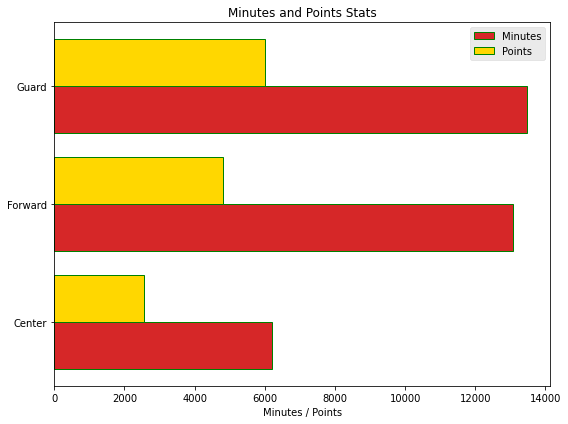

In [11]:
fig = plt.figure(figsize=(8,6))

p = np.arange(len(df.groupby('Position'))) 

x = df.groupby('Position')['Minutes'].sum()
y = df.groupby('Position')['Points'].sum()

plt.barh(p-0.20, x, label='Minutes', height=0.4, align='center', color='tab:red', edgecolor='green')
plt.barh(p+0.20, y, label='Points', height=0.4, align='center', color='gold', edgecolor='green')

plt.yticks(p, label)
# plt.xlim(0,15000)

plt.xlabel("Minutes / Points")
plt.title('Minutes and Points Stats')

plt.style.use('ggplot')
plt.tight_layout()
plt.legend();

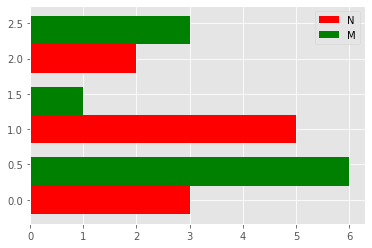

In [12]:
df = pd.DataFrame(dict(graph=['Item one', 'Item two', 'Item three'],
                           n=[3, 5, 2], m=[6, 1, 3])) 

ind = np.arange(len(df))
width = 0.4

fig, ax = plt.subplots()
ax.barh(ind, df.n, width, color='red', label='N')
ax.barh(ind + width, df.m, width, color='green', label='M')

# ax.set(yticks=ind + width, yticklabels=df.graph, ylim=[2*width - 1, len(df)])
ax.legend()

plt.show()

## Examples

In [4]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
df = df.groupby('day').sum()
df

,total_bill,tip,size
day,,,
Thur,1096.33,171.83,152
Fri,325.88,51.96,40
Sat,1778.40,260.40,219
Sun,1627.16,247.39,216


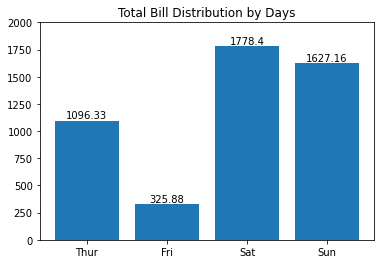

In [12]:
fig, ax = plt.subplots()

x = df.index
y = df.total_bill

ax.bar(x,y )
ax.set_title("Total Bill Distribution by Days")
ax.set_ylim(0, 2000)

for i in range(len(x)):
    plt.text(x[i], y[i], str(round(y[i],2)), ha="center",va="bottom")